In [8]:
#%%
import pims
import numpy as np
import scipy.io as sio
from greedyROI2d import greedyROI2d
from arpfit import arpfit
from sklearn.decomposition import ProjectedGradientNMF
from update_spatial_components import update_spatial_components
from update_temporal_components import update_temporal_components
from matplotlib import pyplot as plt
from time import time
from merge_rois import mergeROIS
import libtiff
from utilities import *
%matplotlib inline

In [9]:
t = libtiff.TiffFile('demoMovie.tif') 
#t = libtiff.TiffFile('/Users/eftychios/Documents/_code/calcium_paper_code/datasets/clay/2014-04-05-003.tif')
tt = t.get_tiff_array() 
Y2 = tt[:]*1.
Y = np.transpose(Y2,(1,2,0))

#%%
sizeY = np.shape(Y)
d1 = sizeY[0]
d2 = sizeY[1]
T = sizeY[-1]

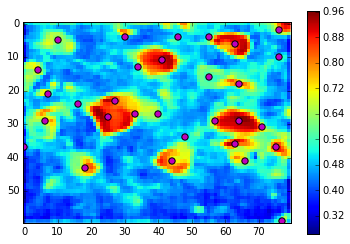

In [11]:
nr = 30
t1 = time()
Ain,Cin,center = greedyROI2d(Y, nr = nr, gSig = [4,4], gSiz = [9,9])
t_elGREEDY = time()-t1

#%% plot centers
Cn = local_correlations(Y)
plt1 = plt.imshow(Cn,interpolation='none')
plt.colorbar()

plt.scatter(x=center[:,1], y=center[:,0], c='m', s=40)
plt.axis((-0.5,d2-0.5,-0.5,d1-0.5))
plt.gca().invert_yaxis()

In [6]:
plt.plot(range(10),range(10))